In [8]:
# DATA-551  
# Project Milestone II  
# Vaghul Aditya Balaji  
# Student No. 10796456  

## Data Cleanup

In [9]:
import pandas as pd

df = pd.read_csv("ufo_data.csv", low_memory = False)

# first, let's drop some of the columns we won't be using in the visualizations
df.drop(columns = ['duration (seconds)', 'duration (hours/min)', 'date posted', 'shape'], inplace = True)

# since our analysis is only restricted to North America, let's filter our data first
df = df[(df['country'] == 'us') | (df['country'] == 'ca')]

# capitalizing the names of cities
df.city = df.city.apply(str.capitalize)

# let's drop all the rows where the state is NaN
df.dropna(subset = ['state'], axis = 0, inplace = True)

# let's convert the datetime column to the appropriate type
df['datetime'] = pd.to_datetime(df['datetime'], errors = "coerce")

# now, let's drop all the rows where the datetime field is NaT and sort data by datetime
df.dropna(subset = ['datetime'], axis = 0, inplace = True)
df.sort_values(by = 'datetime', inplace = True)

# let's convert the latitude column to float64
df.latitude = df.latitude.astype(float)

# removing the space in the longitude column
df.rename(columns = {'longitude ': 'longitude'}, inplace = True)

# finally, we'd want to restrict our data to recent times (so we will stick to the last 60 years)
df = df[df.datetime.dt.year >= 1960]

# saving the edited file for use in Tableau to create the visualizations
df.to_csv("tableau_data.csv", index = False)

## Sentiment Analysis

In [10]:
from textblob import TextBlob

# let's perform sentiment analysis on the comments field
def get_sentiment_polarity(x):
    return TextBlob(x).polarity

df['sentiment-polarity'] = df.comments.astype(str).apply(get_sentiment_polarity)

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# creating our time-series data
ts_data = df.set_index(['datetime'])[['sentiment-polarity', 'state']]
ts_data = ts_data['1976':]
ts_data = ts_data[ts_data.state == 'bc']

# splitting data into positive and negative sentiment analysis
pos_ts_data = ts_data[ts_data['sentiment-polarity'] >= 0]
neg_ts_data = ts_data[ts_data['sentiment-polarity'] <= 0]

# time to plot
fig, axis = plt.subplots(figsize=(15, 9), dpi = 1000)
pos_ts_data.plot(ax = axis, color = "#00b706", label = "Sfd")
neg_ts_data.plot(ax = axis, color = "#e00202", label = "sdfsd")
axis.set_title("Sentiment analysis of comments made on UFO sightings in British Columbia", fontsize = 20)
axis.set_xlabel("Time", fontsize = 18)
axis.set_ylabel("Sentiment Polarity", fontsize = 18)
axis.axhline(0, color = "grey", linewidth = 0.5, linestyle = "--")
axis.legend(['Positive', 'Negative'], loc = "upper left", prop={'size': 18})
axis.tick_params(labelsize = 15)
fig.tight_layout()
axis.grid(False)

## Wordcloud

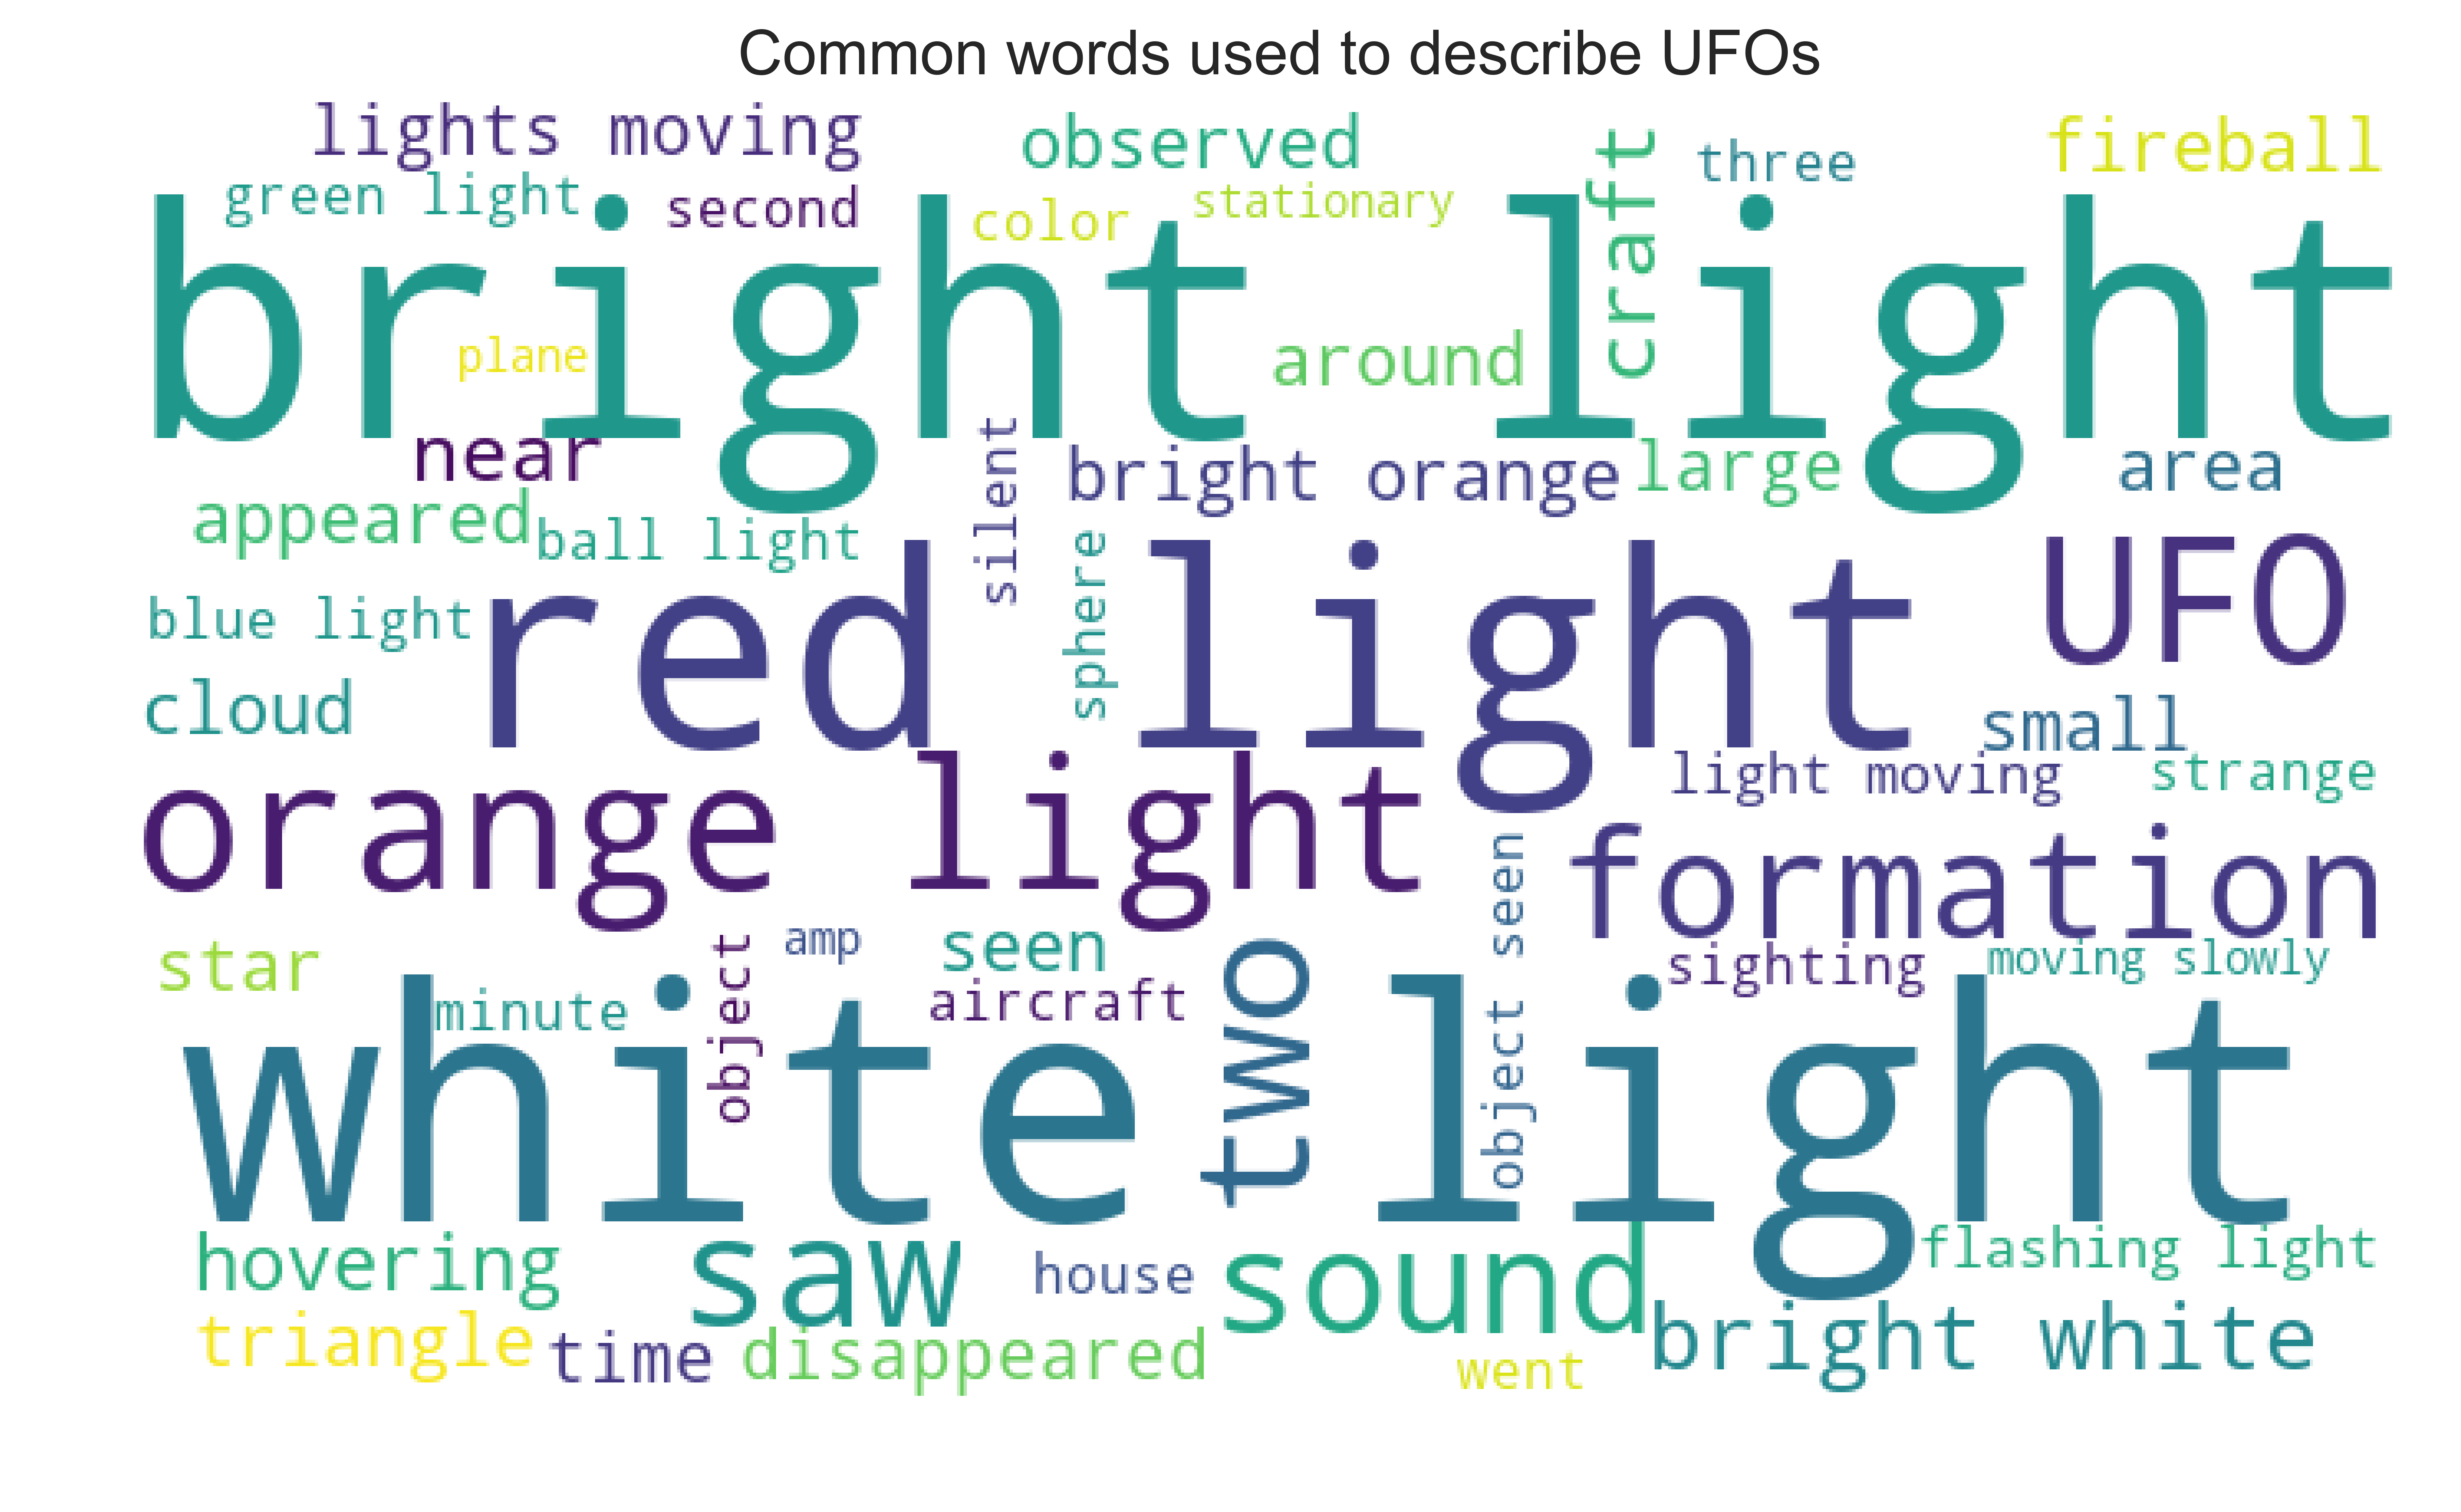

In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# preparing our text input for the wordcloud function
ufo_comments = " ".join(comment for comment in df.comments.astype(str))

stopwords = set(STOPWORDS)
stopwords.update(["shaped", "NUFORC", "Note", "looked", "shape", "sky", "quot", "night", "one", "see"])

wordcloud = WordCloud(width = 700, height = 400, stopwords = stopwords, 
                      max_font_size = 100, max_words = 50, background_color = "white").generate(ufo_comments)
plt.figure(dpi = 1000, figsize = (15, 5))
plt.imshow(wordcloud)
plt.tight_layout()
plt.axis("off")
plt.title("Common words used to describe UFOs", fontsize = 15)
plt.show()